In [1]:
import numpy as np
import pandas as pd

In [2]:
from sqlalchemy import create_engine
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'lhl_student' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'lhl_student' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
POSTGRES_DBNAME = 'mid_term_project' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [13]:
pd.read_sql_query(''' SELECT
  SUM(CASE WHEN arr_delay IS NULL THEN 1 ELSE 0 END) as null_count,
  COUNT(arr_delay) AS count,
  AVG(arr_delay) AS mean,
  STDDEV(arr_delay) AS standard_deviation,
  VARIANCE(arr_delay) AS variance,
  MIN(arr_delay) AS min,
  PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY arr_delay) AS q1,
  PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY arr_delay) AS median,
  PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY arr_delay) AS q3,
  MAX(arr_delay) AS max
   FROM (SELECT *
        FROM flights) as t;''',cnx)

,null_count,count,mean,standard_deviation,variance,min,q1,median,q3,max
0,311744,15615741,5.475932,49.874006,2487.416452,-1290.0,-15.0,-6.0,8.0,2973.0


In [18]:
df = pd.read_sql_query(''' SELECT* from flights limit 1000;''',cnx)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

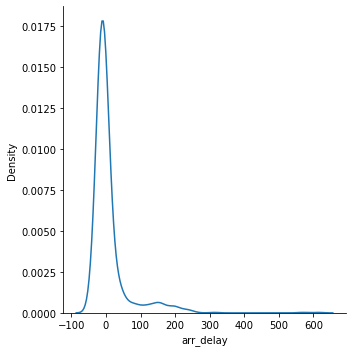

In [22]:
sns.displot(df.arr_delay, kind = 'kde')

In [23]:
df['fl_date']=pd.to_datetime(df.fl_date, format='%Y-%m-%d')    

In [24]:
df['month'] = pd.DatetimeIndex(df['fl_date']).month

Text(0, 0.5, 'Mean delay')

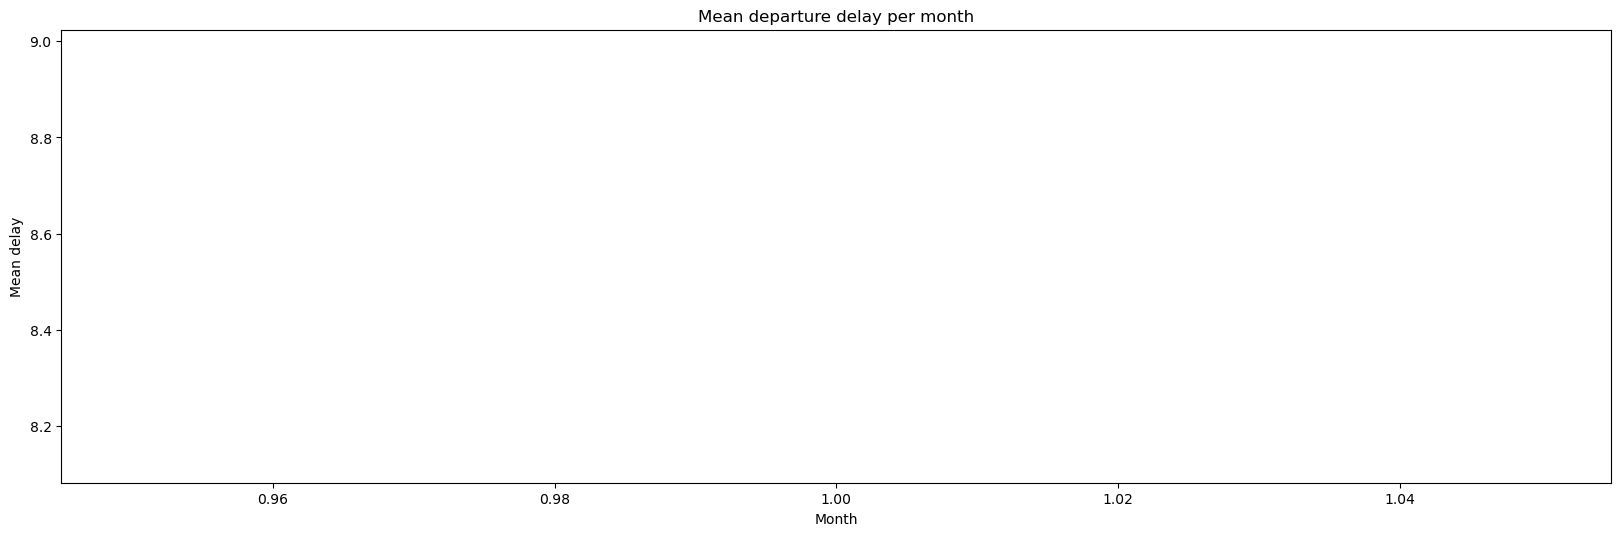

In [28]:
plt.figure(figsize=(20,6),dpi=100)
plt.plot(df['arr_delay'].groupby(df.month).mean(),'-r')
plt.title('Mean departure delay per month')
plt.xlabel('Month')
plt.ylabel('Mean delay')